# Question 2

(a)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Setup
# Basic inputs for bonds and stocks

# Mean
SB_mean = np.array([[0.1], [0.05]])

# Variance-Covariance Matrix
SB_Sigma = np.array([[0.2**2, 0.0002], [0.0002, 0.08**2]])

# Vector of ones
ones2 = np.ones((2, 1))

# Inverse of the variance-covariance matrix
SB_invSigma = np.linalg.inv(SB_Sigma)


In [3]:
# Define vectors for weights: Stock = (0,1)^t and Bond = (1,0)^t
E_w = np.array([[1], [0]])  # Bond
B_w = np.array([[0], [1]])  # Stock

# Create many portfolios as a combination of stock and bond

# Possible combinations of weights
y = np.arange(-10, 10.01, 0.01)  # Create a sequence from -10 to 10 with step 0.01

# Convert y to a 2D array where each row is a weight for a portfolio
y = y.reshape(1, -1)
port = np.dot(B_w, y) + np.dot(E_w, (1 - y))

# Compute expected returns
port_mean = np.dot(port.T, SB_mean)

# Compute var-covar matrix of portfolio returns (we will only use the variances on the main diagonal)
port_var = np.diag(np.dot(np.dot(port.T, SB_Sigma), port))
port_vol = np.sqrt(port_var).reshape(len(port_var), 1)

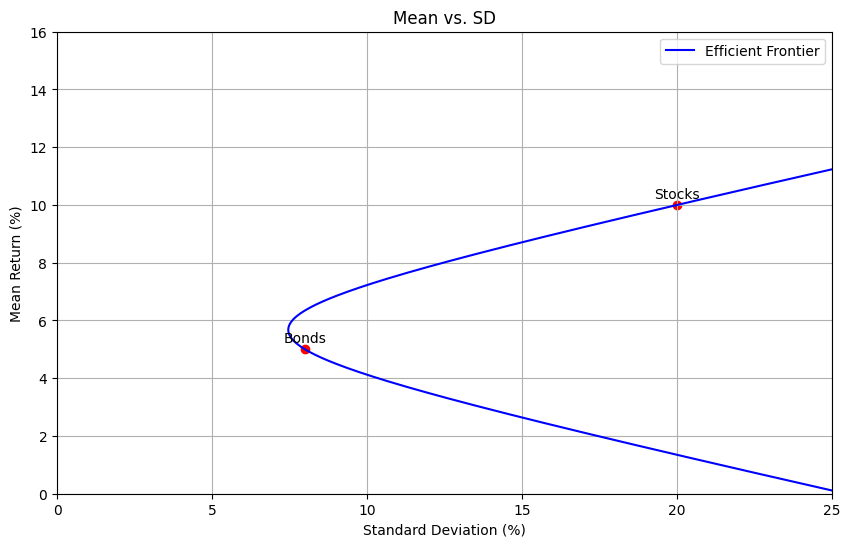

In [4]:
# Plot MV
plt.figure(figsize=(10, 6))
plt.plot(port_vol * 100, port_mean * 100, 'b-', label='Efficient Frontier')
plt.title("Mean vs. SD")
plt.xlabel("Standard Deviation (%)")
plt.ylabel("Mean Return (%)")
plt.xlim(0, 25)
plt.ylim(0, 16)

# Add points for stock and bond funds
plt.scatter(np.sqrt(np.diag(SB_Sigma)) * 100, SB_mean * 100, color='red')
SB_labels = ["Stocks", "Bonds"]

# Annotate pointsS
for i, txt in enumerate(SB_labels):
    plt.annotate(txt, (np.sqrt(np.diag(SB_Sigma))[i] * 100, SB_mean[i] * 100), textcoords="offset points", xytext=(0, 5), ha='center')

plt.legend()
plt.grid(True)
plt.show()

(b)

In [5]:
from sympy import symbols, diff, solve

# Define the variable and the equation, let w be the weight of stock
w = symbols('w')
sigma_squared_p = w**2 * 0.04 + (1 - w)**2 * 0.0064 + 2 * w * (1 - w) * 0.0002

# Compute the derivative with respect to w and solve for when the derivative equals zero
sigma_squared_p_derivative = diff(sigma_squared_p, w)
w_solution = solve(sigma_squared_p_derivative, w)

# Show the solution
w_solution

# The weight for stock is about 0.135, and the weight for bond is about 0.865.

ModuleNotFoundError: No module named 'sympy'

(c)

In [6]:
# Risk-free rate
rf = 0.03

# Excess return
SB_excess = SB_mean - rf

# Tangent portfolio weights 
wT1 = (SB_Sigma[1, 1] * SB_excess[0] - SB_Sigma[1, 0] * SB_excess[1]) / \
      (SB_Sigma[0, 0] * SB_excess[1] + SB_Sigma[1, 1] * SB_excess[0] - SB_Sigma[0, 1] * np.sum(SB_excess))

# Ensure wT1 is a scalar
wT1 = wT1[0]

T_w = np.array([[wT1], [1 - wT1]])

# Mean and volatility of tangent portfolio
T_mean = np.dot(T_w.T, SB_mean)
T_vol = np.sqrt(np.dot(np.dot(T_w.T, SB_Sigma), T_w))

# Sharpe ratio
T_SR = (T_mean - rf) / T_vol

# Possible combinations of weights
yT = np.arange(-10, 10.01, 0.01)
yT = yT.reshape(1, -1)

# Create many portfolios using E and B
portT = np.dot(E_w, yT) + np.dot(B_w, (1 - yT))

# Compute expected returns
portT_mean = np.dot(portT.T, SB_mean)

# Compute var-covar matrix of portfolio returns (we will only use the variances on the main diagonal)
portT_var = np.diag(np.dot(np.dot(portT.T, SB_Sigma), portT))
portT_vol = np.sqrt(portT_var).reshape(len(portT_var), 1)

Plot the CML and tangent portfolio

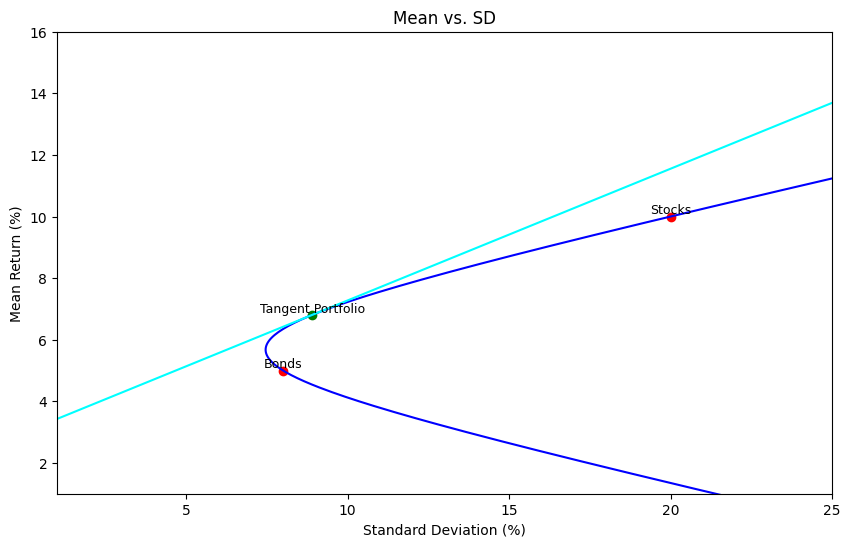

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(portT_vol * 100, portT_mean * 100, 'b-', label='Efficient Frontier')
plt.title("Mean vs. SD")
plt.xlabel("Standard Deviation (%)")
plt.ylabel("Mean Return (%)")
plt.xlim(1, 25)
plt.ylim(1, 16)

# Add points for Tangent portfolio
plt.scatter(T_vol * 100, T_mean * 100, color='green', marker='o')
plt.text(T_vol * 100, T_mean * 100, 'Tangent Portfolio', fontsize=9, ha='center', va='bottom')

# Add points for stock and bond funds
plt.scatter(np.sqrt(np.diag(SB_Sigma)) * 100, SB_mean * 100, color='red', marker='o')
SB_labels = ["Stocks", "Bonds"]
for i, txt in enumerate(SB_labels):
    plt.text(np.sqrt(np.diag(SB_Sigma))[i] * 100, SB_mean[i] * 100, txt, fontsize=9, ha='center', va='bottom')

# Add the CAL to the picture

# Possible combinations of weights
yf = np.arange(0, 10.01, 0.01)

# Compute expected returns
CAL_mean = rf + yf * (T_mean[0, 0] - rf)

# Compute volatilities
CAL_vol = yf * T_vol[0, 0]

# Add CAL to the graph
plt.plot(CAL_vol * 100, CAL_mean * 100, color='cyan', label='Capital Market Line (CAL)')




(d)

In [8]:
# Calculte the weight of tangent portfolio in the optimal portfolio
w_tangent = (T_mean - 0.03)/(4*(T_vol**2))
print(w_tangent)
# So the weight for the tangent portfolio is ~1.20

[[1.20135959]]


In [23]:
# First compute the utility
utility = wstar_mean - (4/2*wstar_vol**2)
print(utility)
# When volatility of the asset equals 0, we get the safe return of the asset equals 0.0529

[[0.05285513]]


**(e)** 

(i) The ratio will not change if a = 8 since the risk-aversion parameter will only affect the weight of tangent portfolio in the optimal portfolio, not the tangent portfolio itself.

(ii) The stock-bond ratio will become higher since the CAL will become flatter (a rise in risk premium will decrease the slope of the line) and the tangent point will lie on a higher position of the efficient frontier, which means the investor will invest more in stocks and less bonds. This shift indicates that, despite the increase in $r_f$, the expected returns from riskier assets like stocks still outweigh the perceived benefits of safer bonds under certain economic conditions. Consequently, this reallocation can be seen as a strategic response to expectations of stronger economic growth or inflationary pressures that might erode the real value of fixed-income returns.